<a href="https://colab.research.google.com/github/mdparvex/DeepFake/blob/main/datasetExploreDeepFake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout,BatchNormalization 
from keras.preprocessing.image import ImageDataGenerator
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import pandas as pd

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

#import splitfolders
import os
import cv2
import numpy as np
import random

In [ ]:
!unzip file_location

unzip:  cannot find or open file_location, file_location.zip or file_location.ZIP.


In [ ]:
!pip install unrar
!unrar x "/content/drive/MyDrive/originalhalfDS.rar"

Streaming output truncated to the last 5000 lines.
Extracting  originalhalfDS/valid/real/00026.jpg                           92%  OK 
Extracting  originalhalfDS/valid/real/00034.jpg                           92%  OK 
Extracting  originalhalfDS/valid/real/00037.jpg                           92%  OK 
Extracting  originalhalfDS/valid/real/00039.jpg                           92%  OK 
Extracting  originalhalfDS/valid/real/00041.jpg                           92%  OK 
Extracting  originalhalfDS/valid/real/00062.jpg                           92%  OK 
Extracting  originalhalfDS/valid/real/00071.jpg                           92%  OK 
Extracting  originalhalfDS/valid/real/00095.jpg                           92%  OK 
Extracting  originalhalfDS/valid/real/00097.jpg                           92%  OK 
Extracting  originalhalfDS/valid/real/00101.jpg                           92%  OK 
Extracting  originalhalfDS/va

In [ ]:
#!unrar x -Y "/content/drive/MyDrive/real-vs-fake.rar" "/content/drive/MyDrive/Colab Notebooks/DeepFake/"

In [ ]:
labels = ["fake", "real"]
img_size = 128
def get_data(data_dir):
    data = []
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)
    

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = get_data('/content/originalhalfDS/train')
val = get_data('/content/originalhalfDS/valid')
test = get_data('/content/originalhalfDS/test')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  from ipykernel import kernelapp as app


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


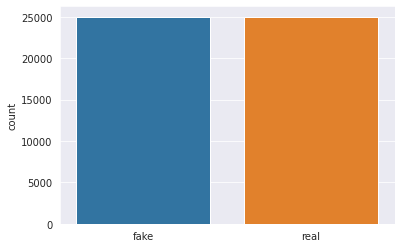

In [ ]:
l = []
for i in train:
    if(i[1] == 0):
      l.append("fake")
    else:
        l.append("real")
sns.set_style('darkgrid')
sns.countplot(l)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


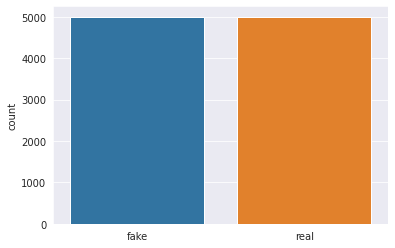

In [ ]:
l = []
for i in val:
    if(i[1] == 0):
      l.append("fake")
    else:
        l.append("real")
sns.set_style('darkgrid')
sns.countplot(l)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


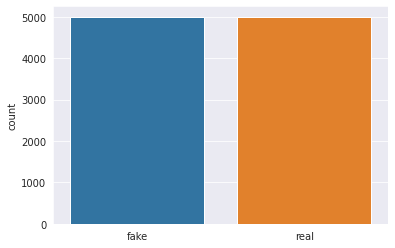

In [ ]:
l = []
for i in test:
    if(i[1] == 0):
      l.append("fake")
    else:
        l.append("real")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'fake')

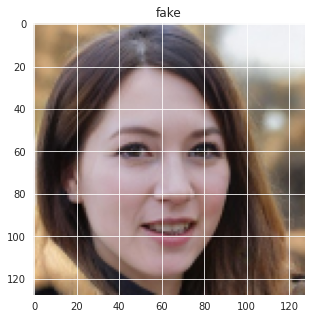

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'real')

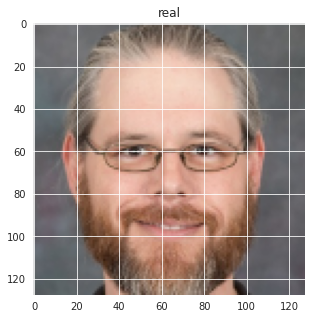

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])